In [13]:
import math
import subprocess
import mpmath
from os import path
import numpy as np
import matplotlib.pyplot as plt
from test_functions import testLog, correctLog

In [14]:
def getDiffBit(f1, f2):
  """Returns the first differing mantissa bit position (0 is least significant)."""
  i1 = np.frombuffer(np.float32(f1).tobytes(), dtype=np.uint32)[0]
  i2 = np.frombuffer(np.float32(f2).tobytes(), dtype=np.uint32)[0]
  diff = i1 ^ i2

  if diff == 0:
    return None

  mantissa_diff = diff & 0x7FFFFF
  if mantissa_diff == 0:
    return None

  return 23 - int(mantissa_diff).bit_length()

In [17]:
def plot():
  mid_interval = np.linspace(1.0, 2.0, 1000, dtype=np.float32)
  fig, axs = plt.subplots(2, 2, figsize=(16, 8), constrained_layout=True)
  #fig.suptitle('Test for logf function with 1000 samples in interval [1, 2]')

  test_log = [testLog(x) for x in mid_interval]
  axs[0, 0].set_title('logf test')
  axs[0, 0].plot(mid_interval, test_log)
  axs[0, 0].set_xlabel('x')
  axs[0, 0].set_ylabel('lalogf(x)')

  abs_errors = [abs(mpmath.mpf(y - correctLog(x))) for x, y in zip(mid_interval, test_log)]
  axs[0, 1].set_title('absolute error')
  axs[0, 1].plot(mid_interval, abs_errors)
  axs[0, 1].set_xlabel('x')
  axs[0, 1].set_ylabel('abs error')

  rel_errors = [abs(e / y) if y != 0.0 else 0.0 for e, y in zip(abs_errors, test_log)]
  axs[1, 0].set_title('relative error')
  axs[1, 0].plot(mid_interval, rel_errors)
  axs[1, 0].set_xlabel('x')
  axs[1, 0].set_ylabel('rel error')

  # diffBits = [getDiffBit(y, correctLog(x)) for x, y in zip(mid_interval, test_log)]
  # bit_counts = [0] * 23
  # for bit in diffBits:
  #   if bit is not None:
  #     bit_counts[bit] += 1

  # axs[1, 1].set_title('mantissa error bit distribution')
  # axs[1, 1].bar(range(23), bit_counts)
  # axs[1, 1].set_xlabel('mantissa bit position')
  # axs[1, 1].set_ylabel('count')

  for ax in np.ravel(axs):
    ax.grid(which='major')
    ax.grid(which='minor', linestyle='--')
    ax.minorticks_on()

  plt.savefig('graphs/lalogf.png')

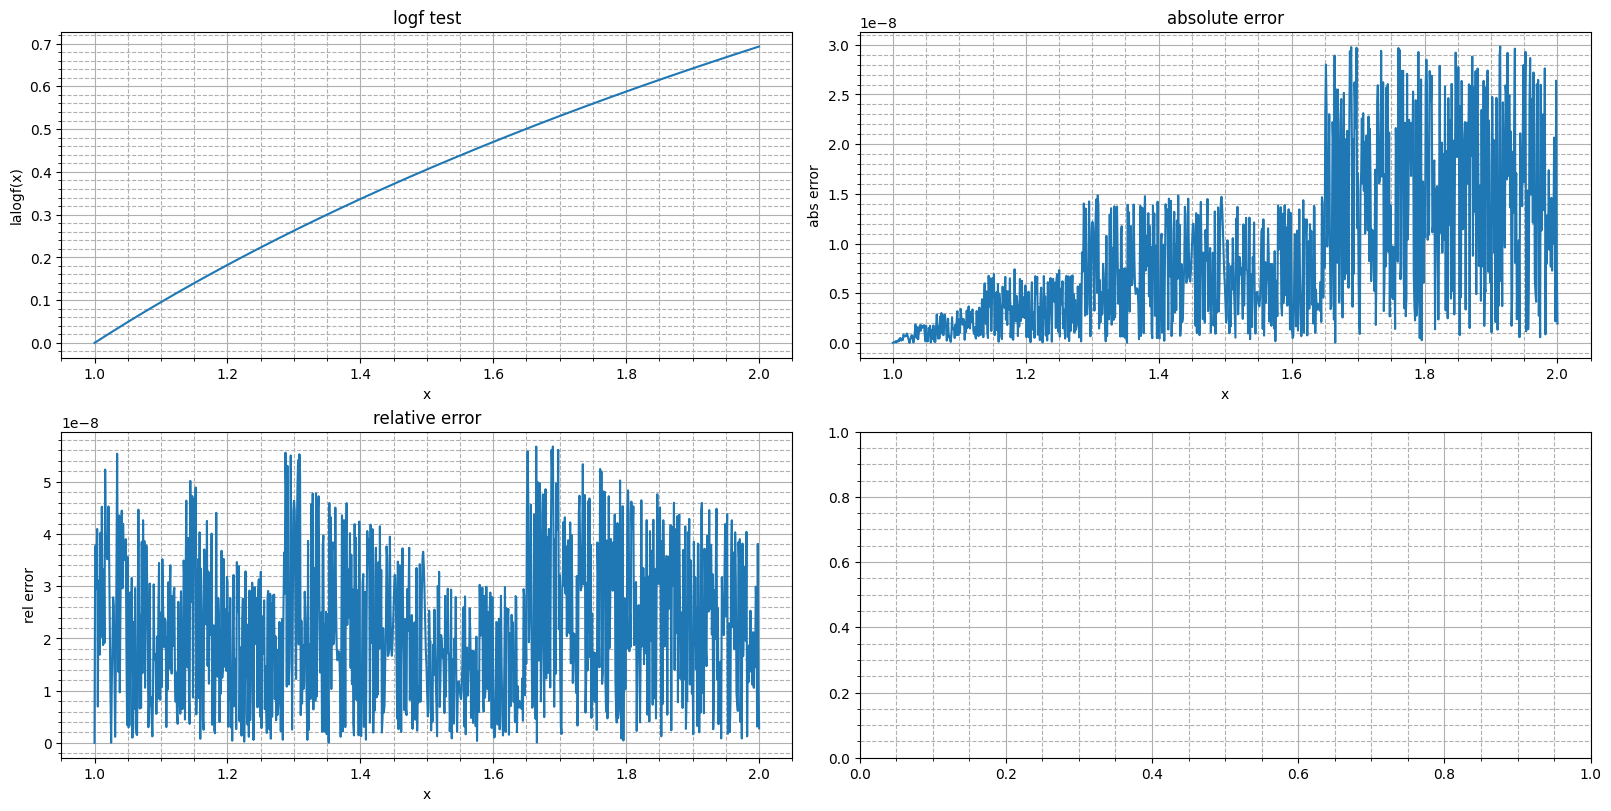

In [18]:
plot()